In [1]:
import pandas as pd
import csv
import netCDF4 as nc
import glob,csv
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#with open('test.csv', 'wb') as fp:
#    a = csv.writer(fp, delimiter=',')
#    data = [['ref.', 'lat.','long.','depth','231Pa diss.','Pa_diss_err','231Pa part.','Pa_part_err','230Th diss.','Th_diss_err','230Th part.','Th_part_err','ice','name'],
#            ['RF1', '52.7','165',  '50'   , '0.035',     '0.007'      , ],
#    a.writerows(data)

##explore IPY2014 data from EGeotracer website

In [4]:
nc_filename=sorted(glob.glob('/ocean/xiaoxiny/research/E-Geotracer/web/*.nc'))
print len(nc_filename)
print("found *.csv file: \n{}".format(nc_filename))

2
found *.csv file: 
['/ocean/xiaoxiny/research/E-Geotracer/web/GEOTRACES_IDP2014_v2_Discrete_Sample_Data.nc', '/ocean/xiaoxiny/research/E-Geotracer/web/INOPEX_ThPa.nc']


In [5]:
data=nc.Dataset(nc_filename[1])
print data.variables

dep = data.variables['depth'][:]
lat = data.variables['lat'][:]
lon = data.variables['lon'][:]
pa_diss = data.variables['var100'][:]#uBq/kg
pa_part = data.variables['var226'][:]#uBq/kg
th_diss = data.variables['var111'][:]#uBq/kg
th_part= data.variables['var229'][:]#uBq/kg

#y = data['Me'];
#print y

OrderedDict([(u'cruise_id', <netCDF4.Variable object at 0x7fb5b4548b00>), (u'sta', <netCDF4.Variable object at 0x7fb5b4548b98>), (u'lat', <netCDF4.Variable object at 0x7fb5b4548c30>), (u'lon', <netCDF4.Variable object at 0x7fb5b4548cc8>), (u'depth', <netCDF4.Variable object at 0x7fb5b4548d60>), (u'lon_360', <netCDF4.Variable object at 0x7fb5b4548df8>), (u'press', <netCDF4.Variable object at 0x7fb5b4548e90>), (u'O2', <netCDF4.Variable object at 0x7fb5b4548f28>), (u'sal', <netCDF4.Variable object at 0x7fb5b4238050>), (u'temp', <netCDF4.Variable object at 0x7fb5b42380e8>), (u'date_collected', <netCDF4.Variable object at 0x7fb5b4238180>), (u'date_U_separation', <netCDF4.Variable object at 0x7fb5b4238218>), (u'Th232', <netCDF4.Variable object at 0x7fb5b42382b0>), (u'Th232_err', <netCDF4.Variable object at 0x7fb5b4238348>), (u'Th232_flag', <netCDF4.Variable object at 0x7fb5b42383e0>), (u'Th230', <netCDF4.Variable object at 0x7fb5b4238478>), (u'Th230_err', <netCDF4.Variable object at 0x7fb5b4

In [27]:
print np.max(pa_diss)
print np.min(pa_diss)

11.3237
0.21141


In [45]:
print lon.shape
print lat.shape
print dep.shape
print pa_diss.shape #N_STATIONS = 796 ;N_SAMPLES = 186 ;

(796,)
(796,)
(796, 186)
(796,)


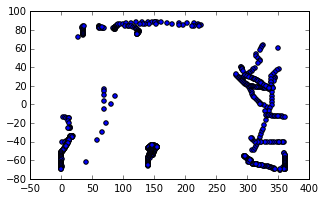

In [46]:
ax = plt.figure(1,figsize=(5,3))
plt.scatter(lon,lat)

lon:325.75,lat:64.0001,depth:2215.0
pa_diss:2.01766

lon:325.75,lat:64.0001,depth:2215.0
pa_diss:2.07424

lon:325.75,lat:64.0001,depth:2215.0
pa_diss:2.40634

lon:325.75,lat:64.0001,depth:2215.0
pa_diss:2.45337

lon:325.75,lat:64.0001,depth:2215.0
pa_diss:2.48195

lon:325.75,lat:64.0001,depth:2215.0
pa_diss:2.44195

lon:325.75,lat:64.0001,depth:2215.0
pa_diss:2.54205

lon:325.75,lat:64.0001,depth:2215.0
pa_diss:1.84849

lon:320.293,lat:58.6022,depth:3125.0
pa_diss:1.69902

lon:320.293,lat:58.6022,depth:3125.0
pa_diss:2.11454

lon:320.293,lat:58.6022,depth:3125.0
pa_diss:2.05463

lon:320.293,lat:58.6022,depth:3125.0
pa_diss:2.22117

lon:320.293,lat:58.6022,depth:3125.0
pa_diss:2.53249

lon:320.293,lat:58.6022,depth:3125.0
pa_diss:2.51522

lon:320.293,lat:58.6022,depth:3125.0
pa_diss:2.3162

lon:320.293,lat:58.6022,depth:3125.0
pa_diss:1.74624

lon:320.293,lat:58.6022,depth:3125.0
pa_diss:1.5601



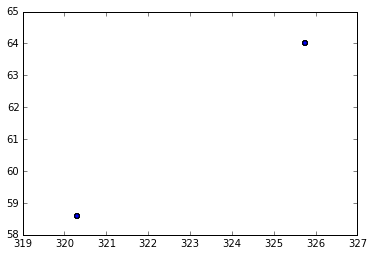

In [70]:
for i in range(len(lat)):
    if lat[i]>55:
        for j in range(len(pa_diss[i,:])):
            if pa_diss[i,j]>0:
                plt.scatter(lon[i],lat[i])
                print ('lon:%s,lat:%s,depth:%s'%(lon[i],lat[i],dep[i]))
                print ('pa_diss:%s'%pa_diss[i,j])
                print ('')